[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Analysis of sample mean of gross domestic product (GDP) data of world countries\
Topics: Sample mean, law of large numbers

Author: Carlos Fernandez-Granda\
Data source: https://unstats.un.org/unsd/snaama/Downloads

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from numpy.random import default_rng
rng = default_rng(2022)

font_size = 15
font_size_legend = 15
font_size_ticks = 15

data_aux = pd.read_csv("../data/GDP_per_capita_US_dollars_2019.csv")
data = data_aux['2019'] / 1000.

N = len(data)
population_mean = np.mean(data)
population_std = np.std(data)
population_median = np.median(data)
print("N: " + str(N))
print("Population mean: " + str(round(population_mean,3)))
print("Population standard deviation: " + str(round(population_std,3)))
print("Median: " + str(round(population_median,3)))

N: 212
Population mean: 17.701
Population standard deviation: 27.04
Median: 6.521


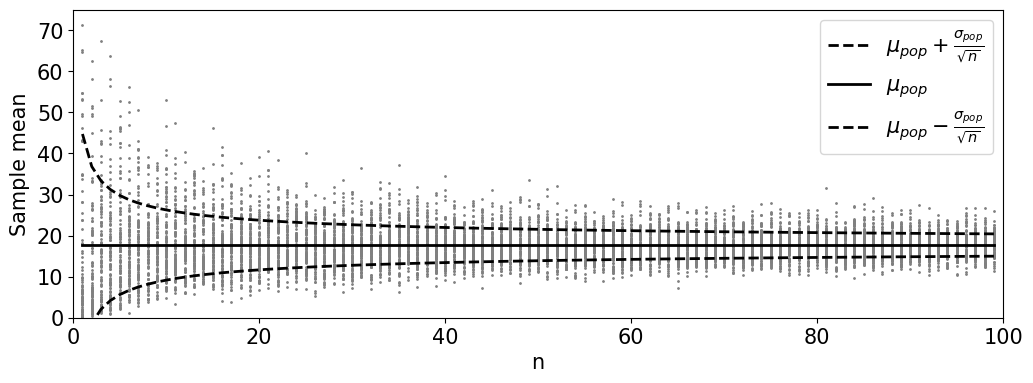

In [3]:
tries = int(1e2)
n_max = 100
n_vals = np.arange(1,n_max,1)
sample_mean_average = np.zeros(N)
sample_mean_std = np.zeros(N)

ymin = 0
ymax = 75

plt.figure(figsize=(12,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
for ind_n,n in enumerate(n_vals):
    if n % 500 == 0:
        print(n)
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(data,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    plt.plot(n * np.ones(tries),sample_means,'.',ms=2,color="gray")
plt.ylim(ymin,ymax)
plt.xlim(0,n_max)
plt.plot(n_vals,population_mean + population_std/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}+\frac{\sigma_{pop}}{\sqrt{n}}$")
plt.plot(n_vals,np.ones(len(n_vals))*population_mean,lw=2,color='black',
         label=r"$\mu_{pop}$")
plt.plot(n_vals,population_mean - population_std/np.sqrt(n_vals),lw=2,ls='dashed',color='black',
         label=r"$\mu_{pop}-\frac{\sigma_{pop}}{\sqrt{n}}$")
plt.xlabel("n",fontsize=font_size)
plt.ylabel('Sample mean',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size);

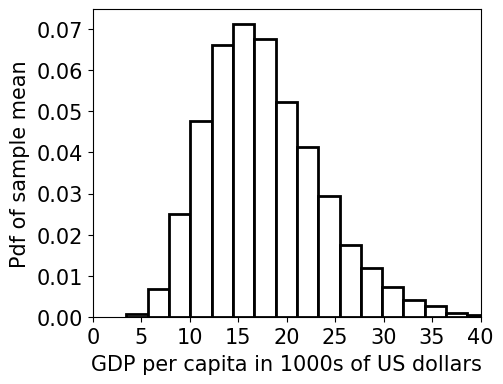

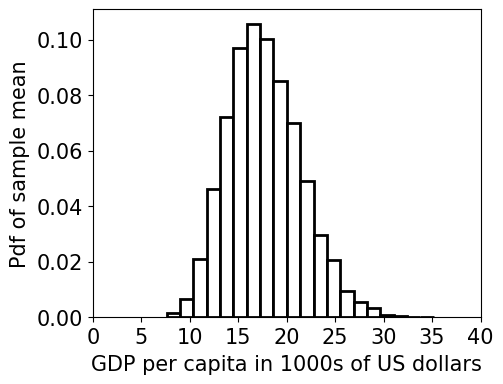

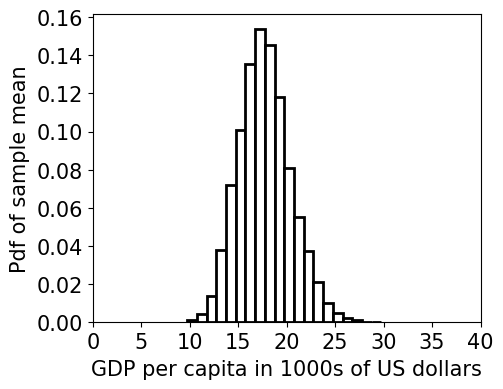

In [19]:
tries = int(1e4)
n_vals = [20,50,100]
n_bins = 20
x = np.arange(-4,4+1e-2,1e-2)
x_min = 0
x_max = 40
y_max = 1.9
x_min_norm = -4.1
x_max_norm = 4.1

for ind_n,n in enumerate(n_vals):
    sample_means = np.zeros(tries)
    for ind_tries in range(tries):
        samples = rng.choice(data,n,replace=True)
        sample_means[ind_tries] = np.mean(samples)
    sample_mean_average[ind_n] = np.mean(sample_means)
    sample_mean_std[ind_n] = np.std(sample_means)  
    plt.figure(figsize=(5,4))
    plt.xticks(fontsize=font_size_ticks) 
    plt.yticks(fontsize=font_size_ticks)
    plt.hist(sample_means,bins=n_bins,color='white', edgecolor='black',
              linewidth=2,density=True)
    plt.xlim([x_min,x_max])
    plt.ylabel(r"Pdf of sample mean",fontsize=font_size,labelpad=5)
    plt.xlabel(r'GDP per capita in 1000s of US dollars',fontsize=font_size,labelpad=5)